In [59]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import json
import ast

In [63]:
path_to_data = '../../data/exam_approach/test_results/'
root, dirs, files = next(os.walk(path_to_data))
for model in dirs:
    print('Evaluation exams of ', model)
    df = pd.read_csv(os.path.join(path_to_data, model, 'test_results_business_and_financial_operations_occupations_scores.csv'),index_col=0)
    print
    print('Number of tasks ', df.shape[0])
    print('Valid python evaluation files ', df['evaluation_python'].sum())
    print('Valid json answer keys ', df['answer_key_json'].sum())
    print('GPT4o valid answers ' ,df['answer_valid_chatgpt4o'].sum())
    print('GPT35 valid answers ' ,df['answer_valid_chatgpt35'].sum())
    print('Claude valid answers ' ,df['answer_valid_claude'].sum())
    print('Gemini valid answers ' ,df['answer_valid_gemini'].sum())
    print('Deepseek valid answers ' ,df['answer_valid_deepseek'].sum())

Evaluation exams of  deepseek-chat
Number of tasks  26
Valid python evaluation files  26
Valid json answer keys  26
GPT4o valid answers  26
GPT35 valid answers  26
Claude valid answers  26
Gemini valid answers  25
Deepseek valid answers  26
Evaluation exams of  gpt-4o
Number of tasks  26
Valid python evaluation files  26
Valid json answer keys  24
GPT4o valid answers  18
GPT35 valid answers  17
Claude valid answers  22
Gemini valid answers  25
Deepseek valid answers  26
Evaluation exams of  claude-3-7-sonnet-20250219
Number of tasks  26
Valid python evaluation files  26
Valid json answer keys  25
GPT4o valid answers  23
GPT35 valid answers  25
Claude valid answers  23
Gemini valid answers  18
Deepseek valid answers  26
Evaluation exams of  gpt-3.5-turbo-0125
Number of tasks  26
Valid python evaluation files  26
Valid json answer keys  21
GPT4o valid answers  16
GPT35 valid answers  17
Claude valid answers  23
Gemini valid answers  26
Deepseek valid answers  26
Evaluation exams of  gemi

In [92]:
def only_none(cell):
    try:
        lst = ast.literal_eval(cell)  # Convert string to list
        return all(item == None for item in lst)  # Check if all elements are 'None'
    except:
        return False  # In case of conversion issues

# Apply function to relevant columns
error_columns = df.filter(like='error')  # Select columns with 'error' in name
result = ~error_columns.applymap(only_none) 
print('there are ', np.sum(result.sum(axis=1)==len(error_columns.columns)).astype(int)
, 'tasks where all evaluations had an error, indicating that the exam or its evaluation script or the answer key is flawed')
print('those tasks are \n', df.loc[result.sum(axis=1)==len(error_columns.columns),'task_id'])
print("removing those 'complete failures', each model failed to submit a valdi answer X amount of time")

result[result.sum(axis=1)!=len(error_columns.columns)].sum()
#result.sum()

there are  7 tasks where all evaluations had an error, indicating that the exam or its evaluation script or the answer key is flawed
those tasks are 
 2     12883.0
3     12882.0
7      1143.0
9      1145.0
22    21424.0
23    21434.0
24    21430.0
Name: task_id, dtype: float64
removing those 'complete failures', each model failed to submit a valdi answer X amount of time


/var/folders/m2/yy15wc4d3zqdtsvvvggmkn780000gp/T/ipykernel_64201/511492355.py:10: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  result = ~error_columns.applymap(only_none)


errors_chatgpt35    13
errors_chatgpt4o     8
errors_claude        7
errors_deepseek      1
errors_gemini        2
dtype: int64

In [82]:
df.filter(like='error')

,errors_chatgpt35,errors_chatgpt4o,errors_claude,errors_deepseek,errors_gemini
0,"['Traceback (most recent call last):\n File ""...",[None],[None],[None],"['Traceback (most recent call last):\n File ""..."
1,"['Traceback (most recent call last):\n File ""...",[None],[None],[None],[None]
2,no answer key or evaluation script found,no answer key or evaluation script found,no answer key or evaluation script found,no answer key or evaluation script found,no answer key or evaluation script found
3,no answer key or evaluation script found,no answer key or evaluation script found,no answer key or evaluation script found,no answer key or evaluation script found,no answer key or evaluation script found
4,[None],[None],[None],[None],[None]
5,[None],[None],[None],[None],[None]
6,"['Traceback (most recent call last):\n File ""...",[None],"['Traceback (most recent call last):\n File ""...",[None],[None]
7,no answer key or evaluation script found,no answer key or evaluation script found,no answer key or evaluation script found,no answer key or evaluation script found,no answer key or evaluation script found
8,"['Traceback (most recent call last):\n File ""...",[None],[None],[None],[None]
9,no answer key or evaluation script found,no answer key or evaluation script found,no answer key or evaluation script found,no answer key or evaluation script found,no answer key or evaluation script found


In [40]:
def convert_numeric(value):
    value = str(value).replace('%', '')  # Remove percentage sign
    value = float(value)  # Convert to float
    return value / 100 if value > 1 else value  # Convert percentages to decimal format


Exam generated by  deepseek-chat


/var/folders/m2/yy15wc4d3zqdtsvvvggmkn780000gp/T/ipykernel_64201/3874390516.py:18: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_algorithms = df_algorithms.fillna(0).applymap(convert_numeric)


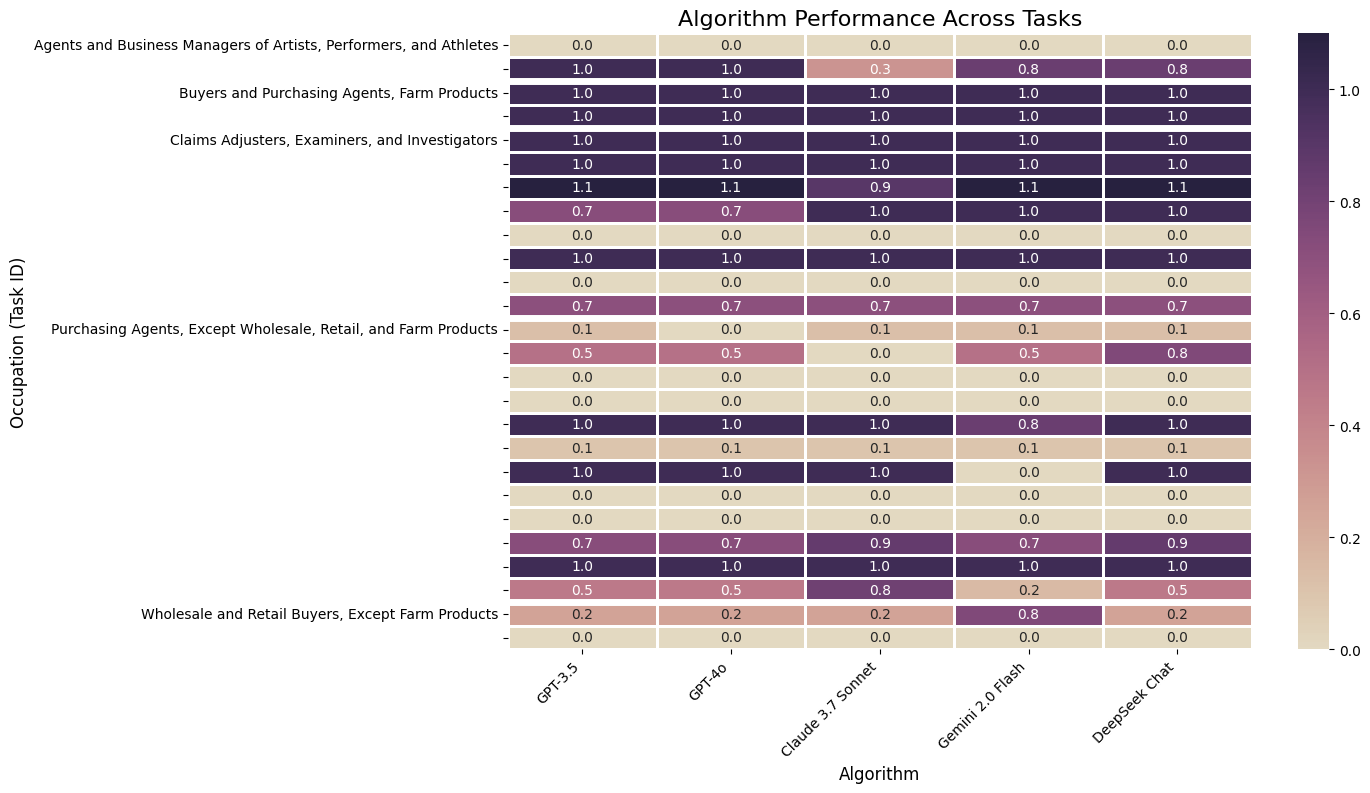

Exam generated by  gpt-4o


/var/folders/m2/yy15wc4d3zqdtsvvvggmkn780000gp/T/ipykernel_64201/3874390516.py:18: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_algorithms = df_algorithms.fillna(0).applymap(convert_numeric)


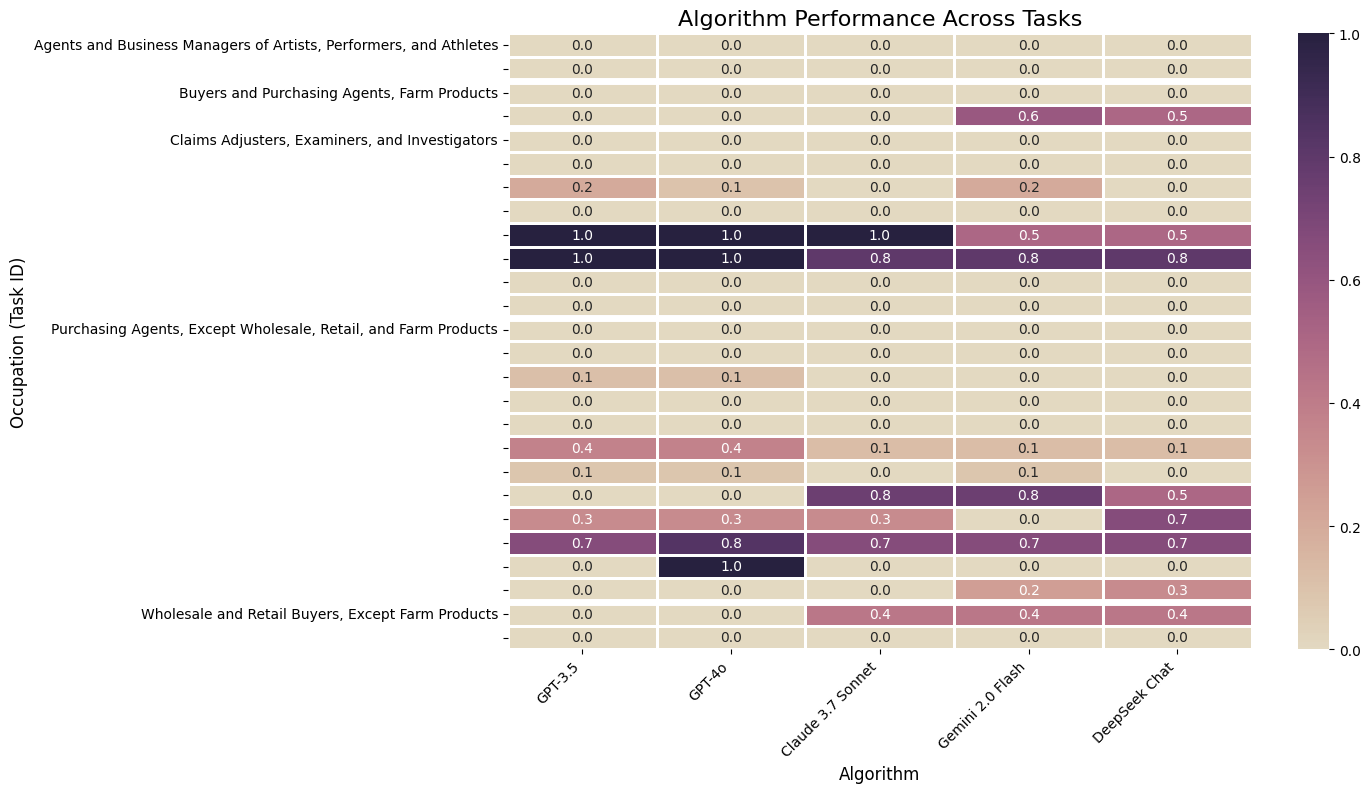

Exam generated by  claude-3-7-sonnet-20250219


/var/folders/m2/yy15wc4d3zqdtsvvvggmkn780000gp/T/ipykernel_64201/3874390516.py:18: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_algorithms = df_algorithms.fillna(0).applymap(convert_numeric)


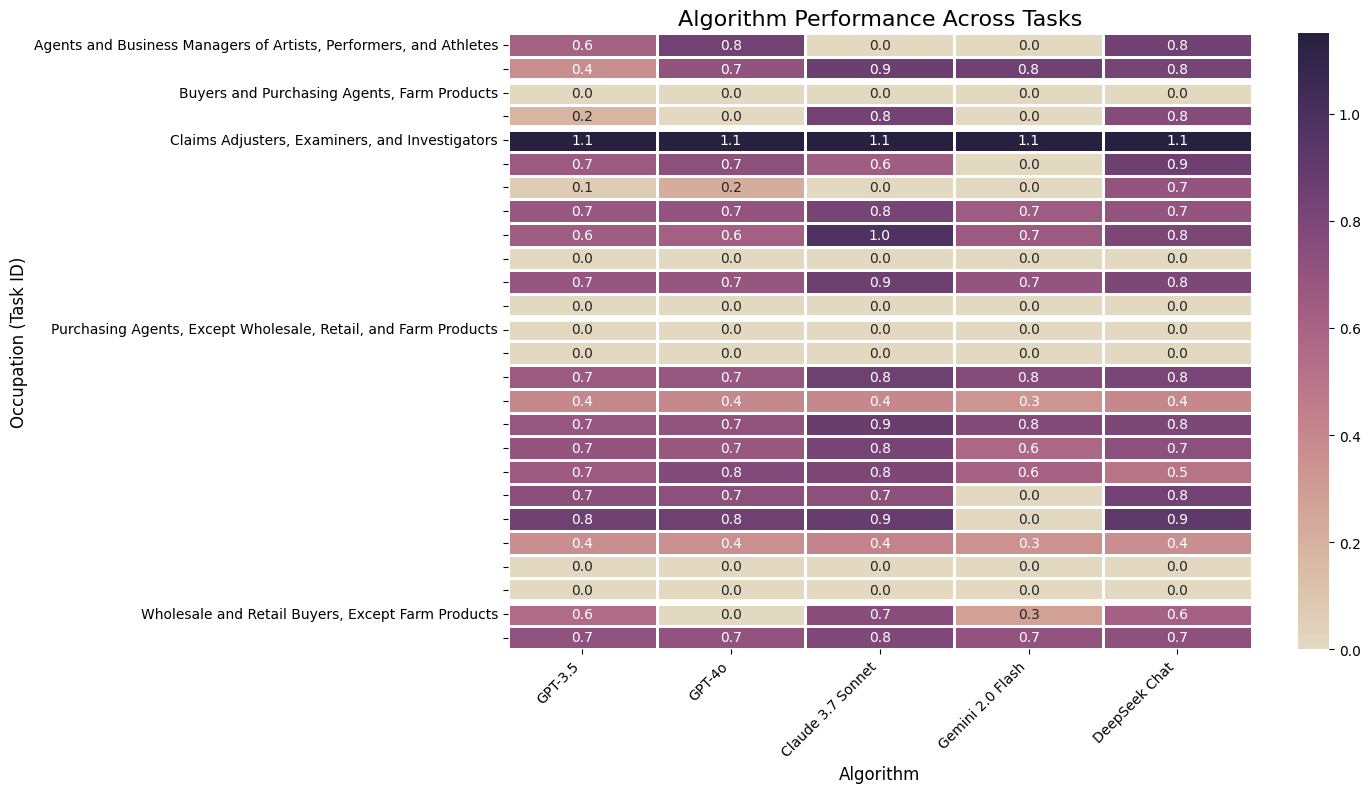

Exam generated by  gpt-3.5-turbo-0125


/var/folders/m2/yy15wc4d3zqdtsvvvggmkn780000gp/T/ipykernel_64201/3874390516.py:18: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_algorithms = df_algorithms.fillna(0).applymap(convert_numeric)


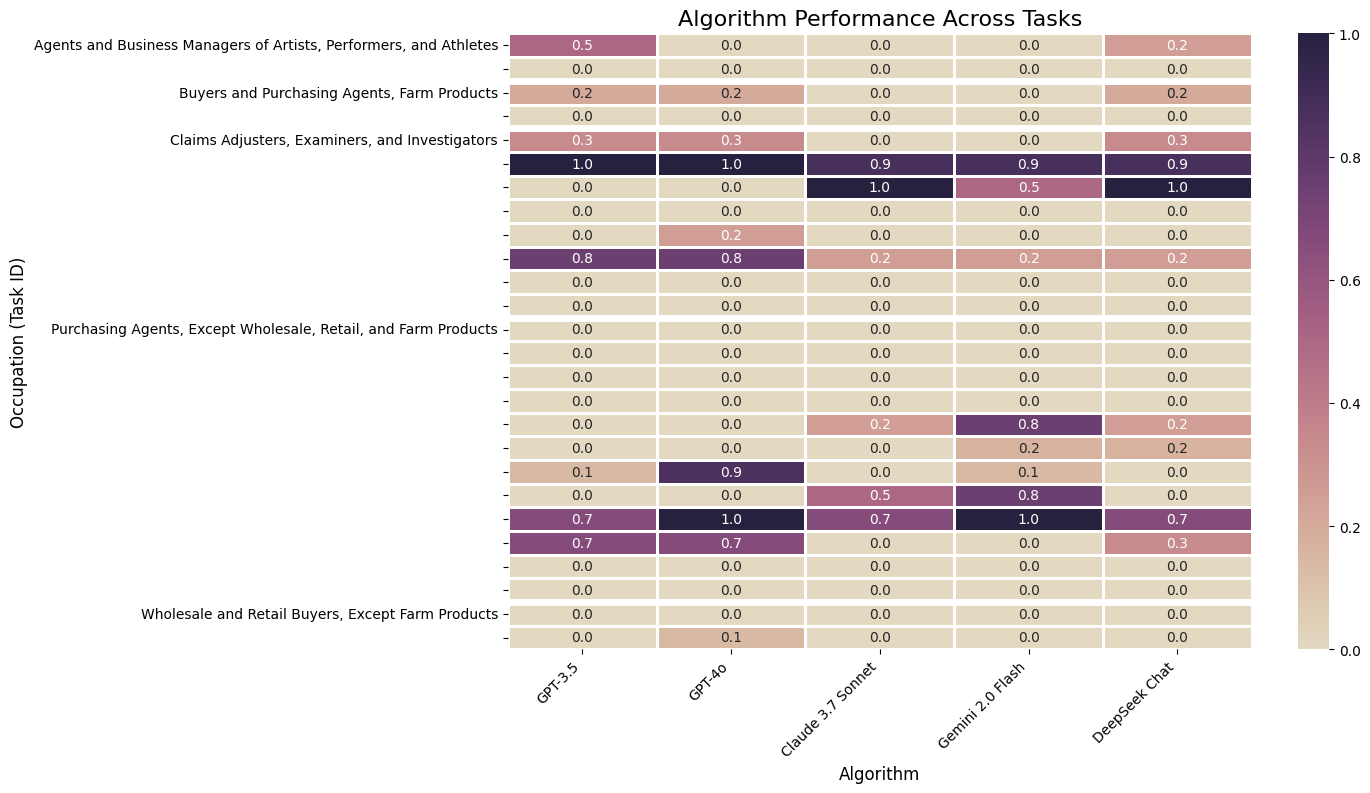

Exam generated by  gemini-2.0-flash


/var/folders/m2/yy15wc4d3zqdtsvvvggmkn780000gp/T/ipykernel_64201/3874390516.py:18: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_algorithms = df_algorithms.fillna(0).applymap(convert_numeric)


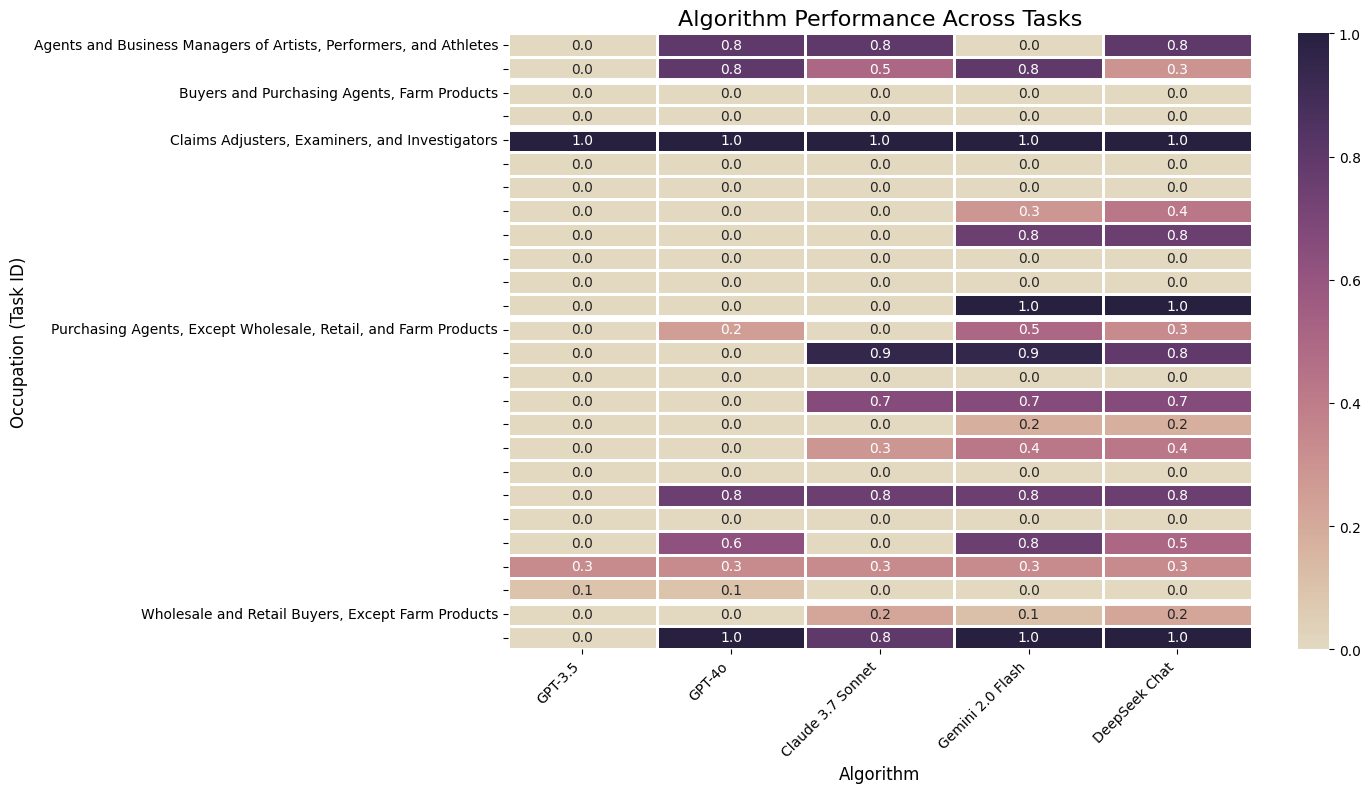

In [42]:
path_to_data = '../../data/exam_approach/test_results/'
root, dirs, files = next(os.walk(path_to_data))
for model in dirs:
    print('Exam generated by ', model)
    df = pd.read_csv(os.path.join(path_to_data, model, 'test_results_business_and_financial_operations_occupations_scores.csv'),index_col=0)

    # Sort dataframe by 'occupation' to group task IDs accordingly
    df_sorted = df.sort_values(by='occupation')
    # Group by 'occupation' and create a new column that indicates if the entry is the first in the group
    df_sorted['is_first_in_group'] = df_sorted.groupby('occupation').cumcount() == 0


    # Select only the algorithm score columns
    df_algorithms = df_sorted[['score_chatgpt35', 'score_chatgpt4o', 'score_claude', 'score_gemini', 'score_deepseek']].\
    rename(columns={'score_chatgpt35': 'GPT-3.5', 'score_chatgpt4o':'GPT-4o','score_claude':'Claude 3.7 Sonnet','score_deepseek':'DeepSeek Chat','score_gemini':'Gemini 2.0 Flash'})

    # Handle missing values by filling them with 0 (or another method like forward-fill)
    df_algorithms = df_algorithms.fillna(0).applymap(convert_numeric)


    # Add a new column for occupation to use as row labels
    df_algorithms['occupation'] = df_sorted['is_first_in_group'] * df_sorted['occupation']

    # Create the heatmap
    plt.figure(figsize=(12, 8))

    # Create the heatmap
    sns.heatmap(
        df_algorithms.drop(columns='occupation'),  # Drop the occupation column from the data itself
        cmap=sns.color_palette("ch:s=-.2,r=.6", as_cmap=True), annot=True, fmt=".1f", linewidths=1, linecolor='white',
        xticklabels=df_algorithms.columns[:-1],  # Exclude the 'occupation' column for x-ticks
        yticklabels=df_algorithms['occupation'],  # Use occupation as the y-tick labels
    )

    # Now, let's add horizontal lines with different colors
    ax = plt.gca()

    # Iterate through the rows and add black lines for new occupation start
    for i in range(1, len(df_algorithms)):
        if df_sorted['occupation'].iloc[i] != df_sorted['occupation'].iloc[i-1]:
            ax.axhline(i, color='white', linewidth=5)  # Add black horizontal line between occupations

    # Add title and axis labels
    plt.title("Algorithm Performance Across Tasks", fontsize=16)
    plt.xlabel("Algorithm", fontsize=12)
    plt.ylabel("Occupation (Task ID)", fontsize=12)

    # Rotate x-axis labels for readability
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)

    # Show the plot
    plt.show()


In [51]:
# Define a function to split labels based on a character limit
def split_label(label, max_length=15):
    # Split the label into chunks of `max_length`
    words = label.split()
    lines = []
    current_line = []
    current_length = 0
    
    for word in words:
        # Check if adding this word exceeds the max length
        if current_length + len(word) + len(current_line) > max_length:
            # If it does, start a new line
            lines.append(" ".join(current_line))
            current_line = [word]
            current_length = len(word)
        else:
            # Otherwise, add the word to the current line
            current_line.append(word)
            current_length += len(word)
    
    # Add the last line
    if current_line:
        lines.append(" ".join(current_line))
    
    # Join the lines with '\n' for multi-line label
    return "\n".join(lines)

In [53]:
def get_tick_alignment(angle):
    if angle == 0:
        return "left",'center'
    if angle >= 0 and angle < np.pi/2:  # Right half
        return "left",'bottom'
    elif angle == np.pi/2:  # Top
        return "center", 'bottom'
    elif angle > np.pi/2 and angle < np.pi: # Left half
        return "right", 'bottom'
    elif angle == np.pi:
        return 'right','center'
    
    elif angle>np.pi and angle<3*np.pi/2:
        return 'right','top'
    elif angle==3*np.pi/2:
        return'center','top'
    elif angle>np.pi:
        return "left", 'top'


Exam generated by  deepseek-chat
26
Purchasing Agents, Except Wholesale, Retail, and Farm Products


/var/folders/m2/yy15wc4d3zqdtsvvvggmkn780000gp/T/ipykernel_64201/451654278.py:10: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  rename(columns={'score_chatgpt35': 'GPT-3.5', 'score_chatgpt4o':'GPT-4o','score_claude':'Claude 3.7 Sonnet','score_deepseek':'DeepSeek Chat','score_gemini':'Gemini 2.0 Flash'}).fillna(0).applymap(convert_numeric)
/var/folders/m2/yy15wc4d3zqdtsvvvggmkn780000gp/T/ipykernel_64201/451654278.py:76: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


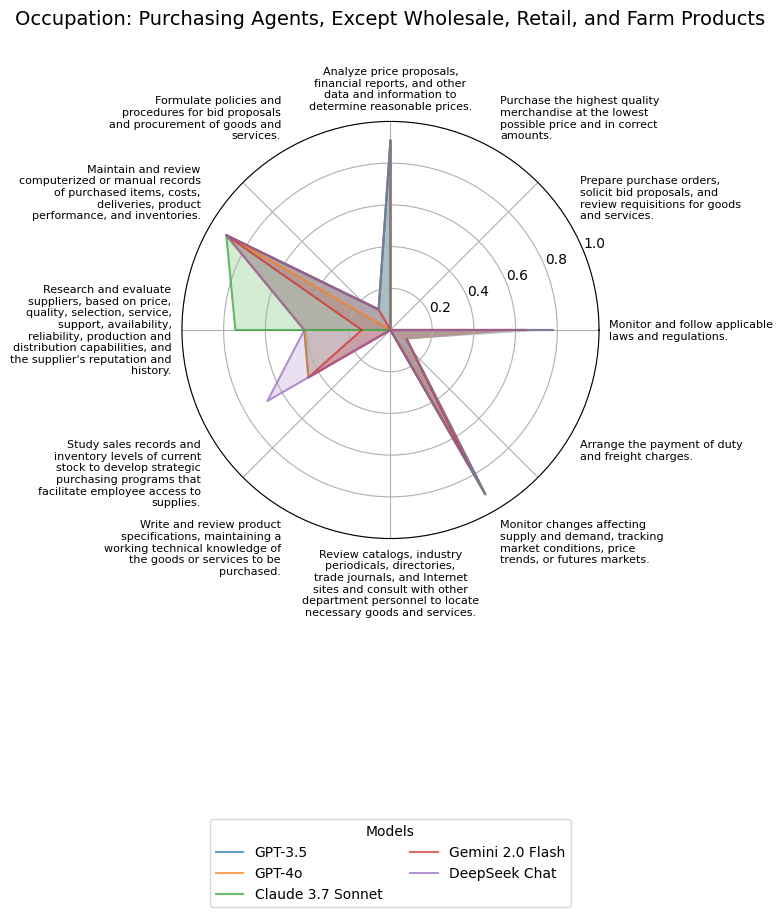

Exam generated by  gpt-4o
26
Purchasing Agents, Except Wholesale, Retail, and Farm Products


/var/folders/m2/yy15wc4d3zqdtsvvvggmkn780000gp/T/ipykernel_64201/451654278.py:10: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  rename(columns={'score_chatgpt35': 'GPT-3.5', 'score_chatgpt4o':'GPT-4o','score_claude':'Claude 3.7 Sonnet','score_deepseek':'DeepSeek Chat','score_gemini':'Gemini 2.0 Flash'}).fillna(0).applymap(convert_numeric)
/var/folders/m2/yy15wc4d3zqdtsvvvggmkn780000gp/T/ipykernel_64201/451654278.py:76: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


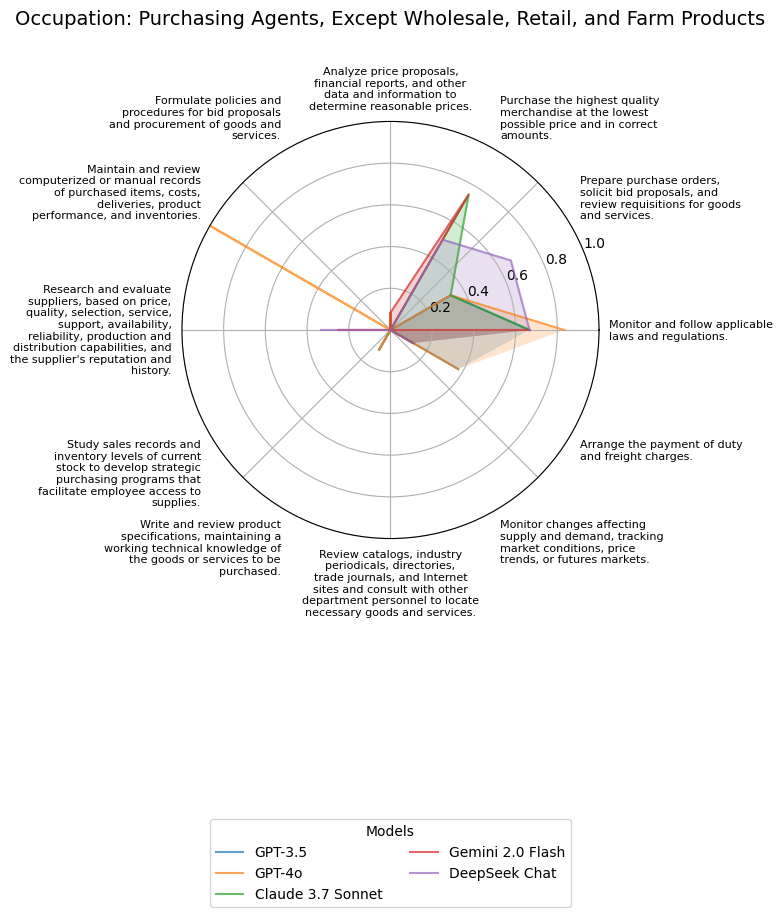

Exam generated by  claude-3-7-sonnet-20250219


/var/folders/m2/yy15wc4d3zqdtsvvvggmkn780000gp/T/ipykernel_64201/451654278.py:10: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  rename(columns={'score_chatgpt35': 'GPT-3.5', 'score_chatgpt4o':'GPT-4o','score_claude':'Claude 3.7 Sonnet','score_deepseek':'DeepSeek Chat','score_gemini':'Gemini 2.0 Flash'}).fillna(0).applymap(convert_numeric)
/var/folders/m2/yy15wc4d3zqdtsvvvggmkn780000gp/T/ipykernel_64201/451654278.py:76: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


26
Purchasing Agents, Except Wholesale, Retail, and Farm Products


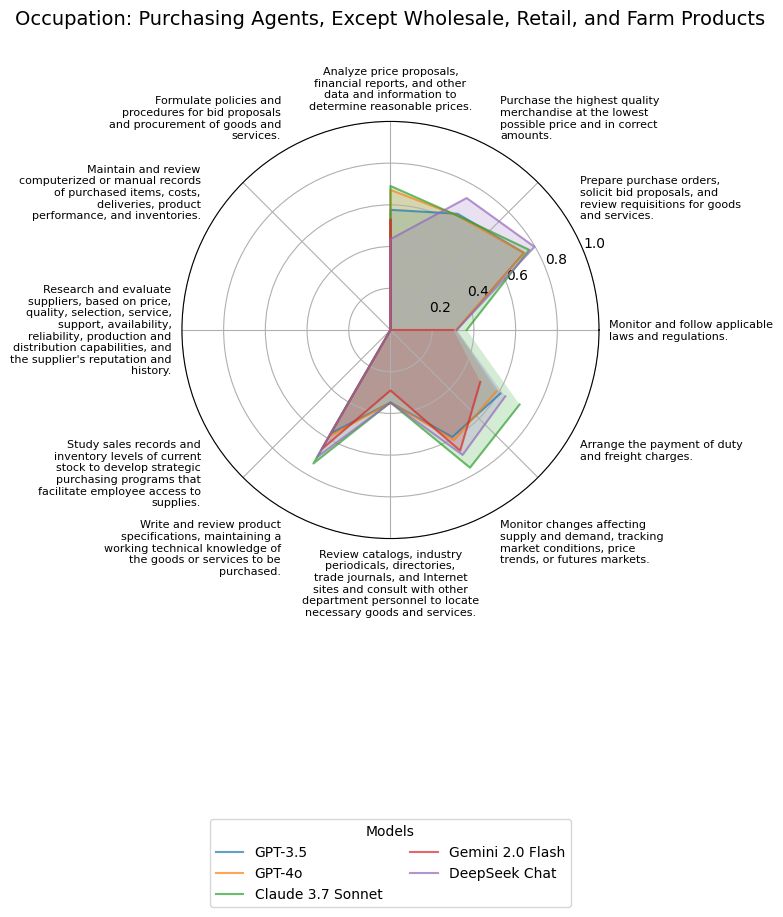

Exam generated by  gpt-3.5-turbo-0125
26
Purchasing Agents, Except Wholesale, Retail, and Farm Products


/var/folders/m2/yy15wc4d3zqdtsvvvggmkn780000gp/T/ipykernel_64201/451654278.py:10: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  rename(columns={'score_chatgpt35': 'GPT-3.5', 'score_chatgpt4o':'GPT-4o','score_claude':'Claude 3.7 Sonnet','score_deepseek':'DeepSeek Chat','score_gemini':'Gemini 2.0 Flash'}).fillna(0).applymap(convert_numeric)
/var/folders/m2/yy15wc4d3zqdtsvvvggmkn780000gp/T/ipykernel_64201/451654278.py:76: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


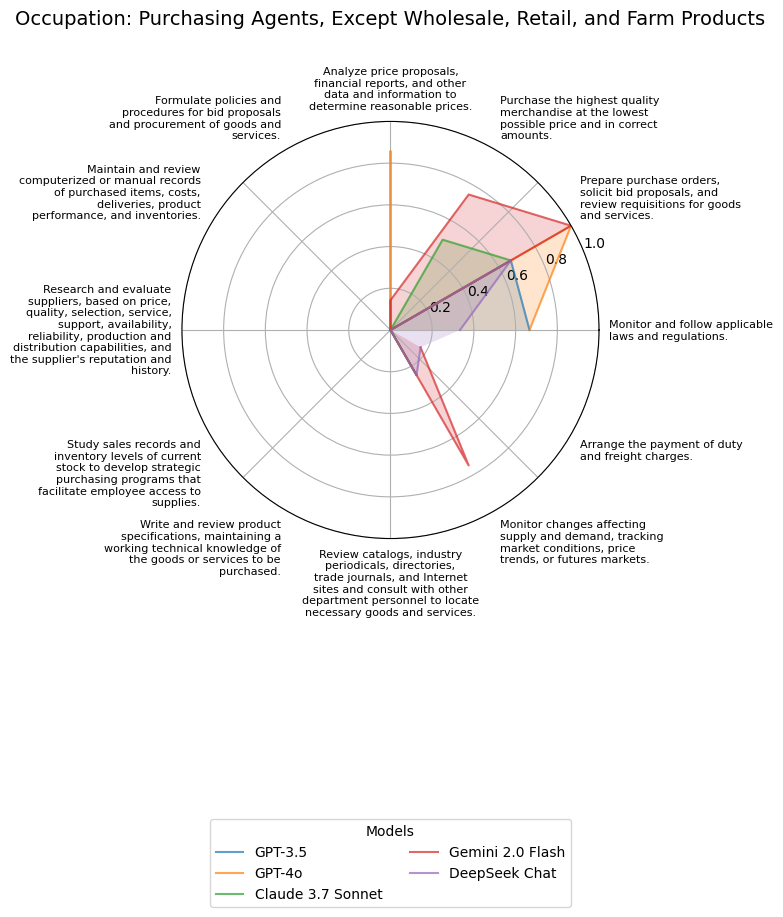

Exam generated by  gemini-2.0-flash
26
Purchasing Agents, Except Wholesale, Retail, and Farm Products


/var/folders/m2/yy15wc4d3zqdtsvvvggmkn780000gp/T/ipykernel_64201/451654278.py:10: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  rename(columns={'score_chatgpt35': 'GPT-3.5', 'score_chatgpt4o':'GPT-4o','score_claude':'Claude 3.7 Sonnet','score_deepseek':'DeepSeek Chat','score_gemini':'Gemini 2.0 Flash'}).fillna(0).applymap(convert_numeric)
/var/folders/m2/yy15wc4d3zqdtsvvvggmkn780000gp/T/ipykernel_64201/451654278.py:76: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


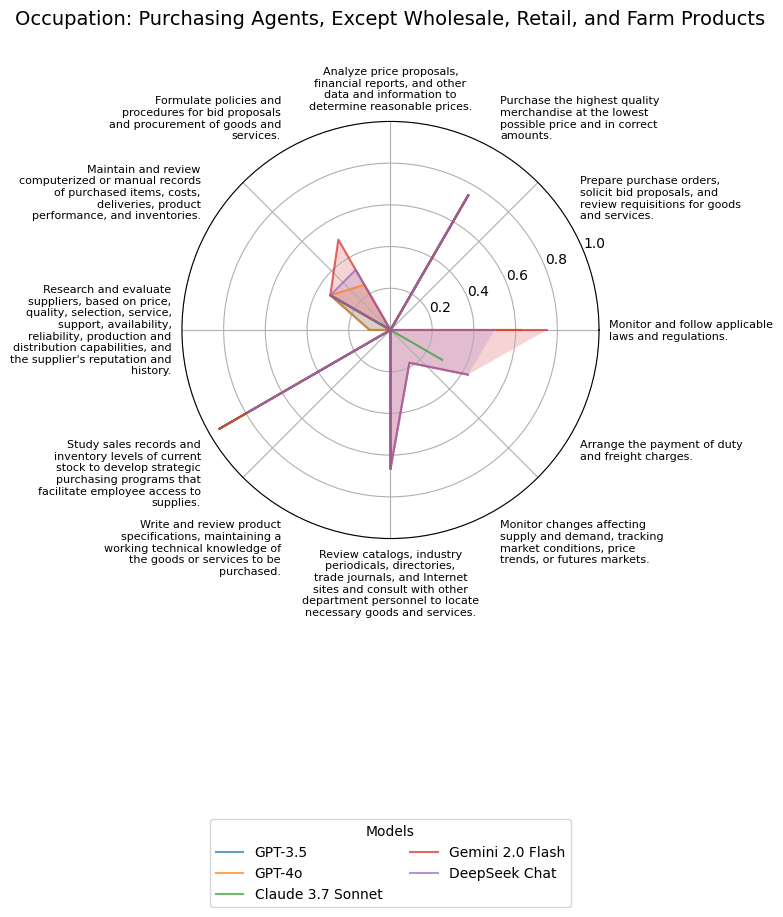

In [ ]:
path_to_data = '../../data/exam_approach/test_results/'
root, dirs, files = next(os.walk(path_to_data))
for model in dirs:
    print('Exam generated by ', model)
    df = pd.read_csv(os.path.join(path_to_data, model, 'test_results_business_and_financial_operations_occupations_scores.csv'),index_col=0)

    
    
    df_radial_plot = df[['score_chatgpt35', 'score_chatgpt4o', 'score_claude', 'score_gemini', 'score_deepseek']].\
    rename(columns={'score_chatgpt35': 'GPT-3.5', 'score_chatgpt4o':'GPT-4o','score_claude':'Claude 3.7 Sonnet','score_deepseek':'DeepSeek Chat','score_gemini':'Gemini 2.0 Flash'}).fillna(0).applymap(convert_numeric)
    print(df_radial_plot.shape[0])
    df_radial_plot = pd.concat([df[['occupation','task_description']], df_radial_plot], axis=1)
    # Assuming df_algorithms contains the task descriptions and model scores
    models = ['GPT-3.5', 'GPT-4o', 'Claude 3.7 Sonnet', 'Gemini 2.0 Flash',
        'DeepSeek Chat']# 1. Get unique occupations
    #occupations = df['occupation'].unique()

    df_radial_plot = df_radial_plot.fillna(0)
    # 2. Create the figure with subplots, one for each occupation
    fig, axes = plt.subplots(nrows=len(occupations), figsize=(10, len(occupations) * 5), subplot_kw={'projection': 'polar'})
    fig.tight_layout(h_pad=4)

    min_scale = df_radial_plot[models].min().min()
    max_scale = df_radial_plot[models].max().max()
    # Loop through each occupation and create a radial plot for each
    for i, occupation in enumerate(occupations):
        print(occupation)
        # Get the data for the current occupation
        occupation_data = df_radial_plot[df_radial_plot['occupation'] == occupation]
        
        # Create an axis for the current subplot (using polar projection)
        ax = axes[i] if len(occupations) > 1 else axes
        
        # Set title for the subplot
        ax.set_title(f"Occupation: {occupation}", fontsize=14, pad=70)

        # Set the number of tasks (this will determine the number of angular divisions)
        num_tasks = len(occupation_data)
        angles = np.linspace(0, 2 * np.pi, num_tasks, endpoint=False)  # Angles for each task
        
        # Loop through each model and plot its data in radial form
        for j, model in enumerate(models):
            scores = occupation_data[model].values  # y-axis (model score)
            scores_normalized = np.interp(scores, (min_scale, max_scale), (0, 1))  # Normalize
            # Plot each model with the filled area
            ax.fill(angles, scores_normalized, alpha=0.2, label='', zorder=1)
            ax.plot(angles, scores_normalized, label=model if i == 0 else "", alpha=0.7)
        
        # Set the angular ticks to be task descriptions
            #ax.set_xticks(angles)
            ax.set_xticklabels([])

        # Split the labels into multiple lines
        new_labels = [split_label(label, max_length=30) for label in occupation_data['task_description']]
        
        # Set the xticklabels only once
        #ax.set_xticklabels(new_labels, fontsize=8, rotation=45, ha='right')

        # Customize tick label alignment based on angle
        for angle, label in zip(angles, new_labels):
            ha, va = get_tick_alignment(angle)  # Get horizontal and vertical alignment based on angle
            ax.text(angle, 1.05, label, horizontalalignment=ha, verticalalignment=va, fontsize=8, color="black", zorder=2)

        ax.set_ylim(0, 1)  # Set radial limits (0 to 1 after normalization)

    # Add legend only once (at the end), broken into multiple rows
    axes.legend(
        loc='lower center',
        fontsize=10,  # Legend font size
        ncol=2,  # Number of columns in the legend
        title="Models",  # Legend title
        bbox_to_anchor=(.5, -.9)
    )
    # Adjust layout to prevent overlap
    plt.tight_layout()

    # Show the plot
    plt.show()